In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [4]:
# Import the requests library.
import requests

# Import the API key.
# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kushmurun
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | tautira
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | okhotsk
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | chemal
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | vardo
Processing Record 11 of Set 1 | goianesia
Processing Record 12 of Set 1 | atar
Processing Record 13 of Set 1 | moose factory
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | zhanaozen
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | ranong
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | mount isa
Processing Record 20 of Set 1 | tevaitoa
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | asau
Processing Record 23 of Set 1 | sovetskiy
Processing Reco

Processing Record 40 of Set 4 | meiktila
Processing Record 41 of Set 4 | neuquen
Processing Record 42 of Set 4 | padang
Processing Record 43 of Set 4 | srinivaspur
Processing Record 44 of Set 4 | kristiansund
Processing Record 45 of Set 4 | yellowknife
Processing Record 46 of Set 4 | portoferraio
Processing Record 47 of Set 4 | norden
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | raga
Processing Record 50 of Set 4 | begichevskiy
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | san quintin
Processing Record 3 of Set 5 | portland
Processing Record 4 of Set 5 | bilibino
Processing Record 5 of Set 5 | constitucion
Processing Record 6 of Set 5 | santarem
Processing Record 7 of Set 5 | port lincoln
Processing Record 8 of Set 5 | cermik
Processing Record 9 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 5 | lalomanu
City not found. Skipping...
Processing Record 11 of Set 5 | athens
Processing Record 12 of Set 5 | tho

Processing Record 28 of Set 8 | santa rita
Processing Record 29 of Set 8 | cuamba
Processing Record 30 of Set 8 | igaci
Processing Record 31 of Set 8 | kulevcha
Processing Record 32 of Set 8 | sawakin
Processing Record 33 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 34 of Set 8 | palauig
Processing Record 35 of Set 8 | roma
Processing Record 36 of Set 8 | lovington
Processing Record 37 of Set 8 | mineros
Processing Record 38 of Set 8 | anaconda
Processing Record 39 of Set 8 | kibala
Processing Record 40 of Set 8 | pechenga
Processing Record 41 of Set 8 | navahrudak
Processing Record 42 of Set 8 | grand-santi
Processing Record 43 of Set 8 | nara
Processing Record 44 of Set 8 | castro
Processing Record 45 of Set 8 | maturin
Processing Record 46 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 47 of Set 8 | barmer
Processing Record 48 of Set 8 | abu samrah
Processing Record 49 of Set 8 | lavrentiya
Processing Record 50 of Set 8 | mpongwe
Pro

Processing Record 15 of Set 12 | moche
Processing Record 16 of Set 12 | jonesboro
Processing Record 17 of Set 12 | khandyga
Processing Record 18 of Set 12 | carutapera
Processing Record 19 of Set 12 | ossora
Processing Record 20 of Set 12 | mount pleasant
Processing Record 21 of Set 12 | la gaulette
City not found. Skipping...
Processing Record 22 of Set 12 | koplik
Processing Record 23 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 24 of Set 12 | surt
Processing Record 25 of Set 12 | camacha
Processing Record 26 of Set 12 | temaraia
City not found. Skipping...
Processing Record 27 of Set 12 | marcona
City not found. Skipping...
Processing Record 28 of Set 12 | alice springs
Processing Record 29 of Set 12 | champerico
Processing Record 30 of Set 12 | faanui
Processing Record 31 of Set 12 | marfino
Processing Record 32 of Set 12 | eydhafushi
Processing Record 33 of Set 12 | mitoc
Processing Record 34 of Set 12 | griffith
Processing Record 35 of Set 12 | rock sound
Pr

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kushmurun,52.4503,64.6311,19.27,79,100,10.54,KZ,2022-02-05 17:09:20
1,Rikitea,-23.1203,-134.9692,78.62,73,53,12.82,PF,2022-02-05 17:08:11
2,Tautira,-17.7333,-149.1500,78.82,74,29,15.59,PF,2022-02-05 17:09:21
3,Chuy,-33.6971,-53.4616,83.12,50,83,8.52,UY,2022-02-05 17:09:22
4,Okhotsk,59.3833,143.3000,-3.98,67,0,17.07,RU,2022-02-05 17:09:22
5,Qaanaaq,77.4840,-69.3632,0.00,74,89,4.36,GL,2022-02-05 17:04:30
6,Saint-Philippe,-21.3585,55.7679,83.79,85,100,20.85,RE,2022-02-05 17:05:44
7,Chemal,51.4111,86.0050,6.55,89,5,5.68,RU,2022-02-05 17:09:23
8,Punta Arenas,-53.1500,-70.9167,62.71,59,75,34.52,CL,2022-02-05 17:09:24
9,Vardo,70.3705,31.1107,26.55,78,100,26.98,NO,2022-02-05 17:08:08


In [11]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kushmurun,100,KZ,2022-02-05 17:09:20,79,52.4503,64.6311,19.27,10.54
1,Rikitea,53,PF,2022-02-05 17:08:11,73,-23.1203,-134.9692,78.62,12.82
2,Tautira,29,PF,2022-02-05 17:09:21,74,-17.7333,-149.1500,78.82,15.59
3,Chuy,83,UY,2022-02-05 17:09:22,50,-33.6971,-53.4616,83.12,8.52
4,Okhotsk,0,RU,2022-02-05 17:09:22,67,59.3833,143.3000,-3.98,17.07
5,Qaanaaq,89,GL,2022-02-05 17:04:30,74,77.4840,-69.3632,0.00,4.36
6,Saint-Philippe,100,RE,2022-02-05 17:05:44,85,-21.3585,55.7679,83.79,20.85
7,Chemal,5,RU,2022-02-05 17:09:23,89,51.4111,86.0050,6.55,5.68
8,Punta Arenas,75,CL,2022-02-05 17:09:24,59,-53.1500,-70.9167,62.71,34.52
9,Vardo,100,NO,2022-02-05 17:08:08,78,70.3705,31.1107,26.55,26.98


In [12]:
# Create the output file (CSV).
output_data_file = "C:/Users/m143795/Desktop/Class/World_Weather_Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

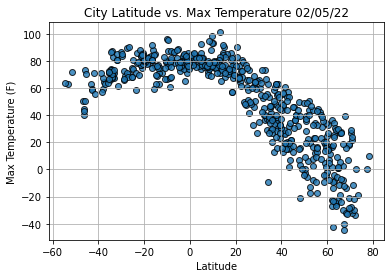

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C:/Users/m143795/Desktop/Class/World_Weather_Analysis/weather_data/Fig1.png")

# Show plot.
plt.show()

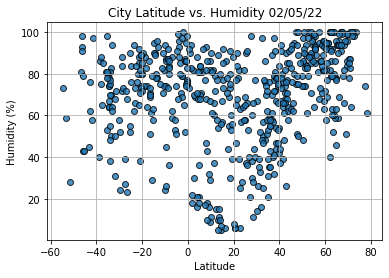

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:/Users/m143795/Desktop/Class/World_Weather_Analysis/weather_data/Fig2.png")
# Show plot.
plt.show()

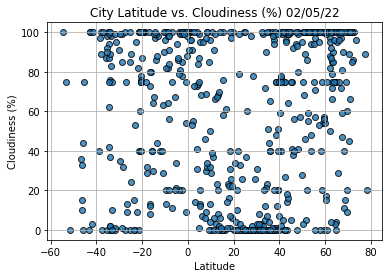

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:/Users/m143795/Desktop/Class/World_Weather_Analysis/weather_data/Fig3.png")
# Show plot.
plt.show()

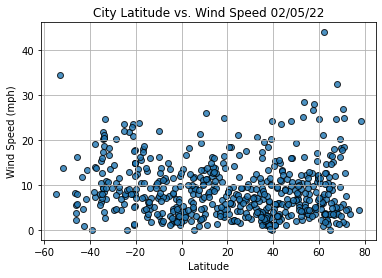

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:/Users/m143795/Desktop/Class/World_Weather_Analysis/weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

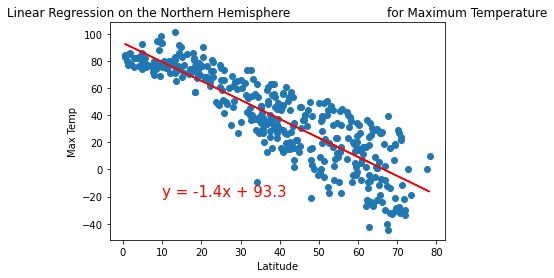

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-20))

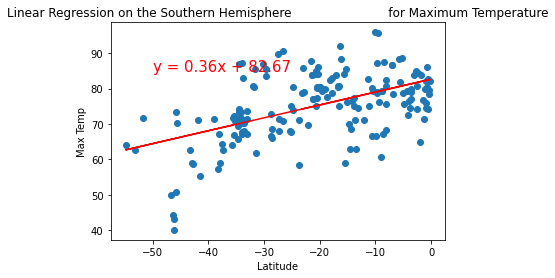

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

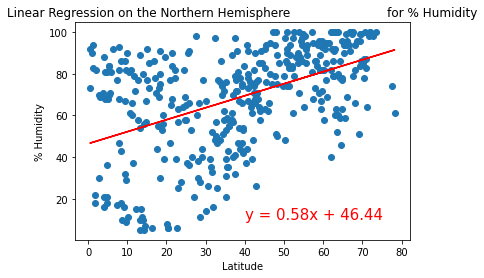

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

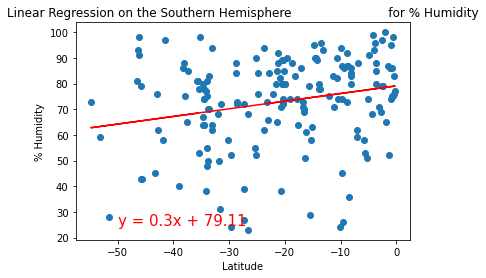

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,25))

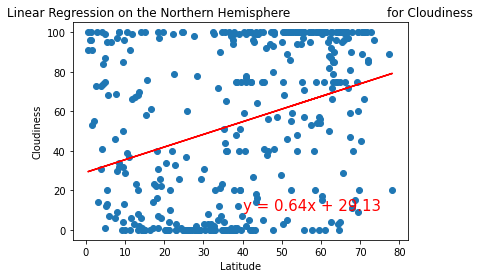

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

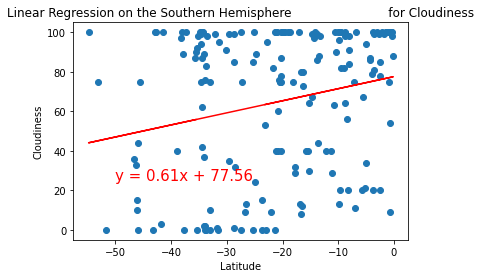

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,25))

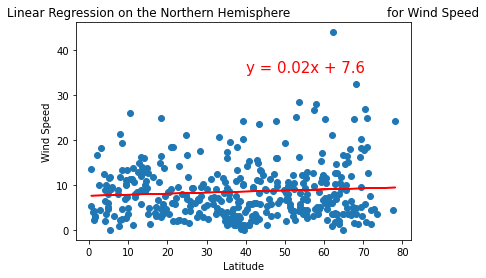

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

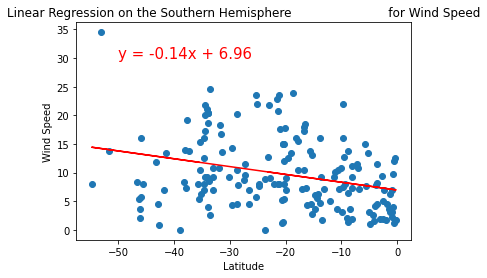

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))